In [136]:
# -*- coding: utf-8 -*-

#Basic functions
import numpy as np
import math 
import pandas as pd
from scipy.special import comb
from scipy.ndimage.filters import gaussian_filter1d
import random
import winsound
import numba
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#Plot functions
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pylab


# The generative model
from Data_preprocessing import *
from Neuron_PopModel_v1 import *

## Read the spiking time, location and SWR replay time data

In [137]:
original_data = loadmat('Tmaze_spiking_data2.mat')
original_data_ripple = loadmat('rippspin-times-FGHIJ.mat')
position = loadmat('Tmaze_location_data.mat')
epochs = pd.read_csv('epochs.csv')

## Pre-precesing and data cleaning. The function was writing in the script. 
### Running the function based on the script Data_preprocessing.

In [57]:
# pre-processing with different time bin size
Fpre, Fawake, Fsleep =  data_pre(30, 300, 30, 'FcellsCopy', 'Felix', 'Fpositiondata', epochs, original_data, position) # extract the binary neuron data from the original one with different time bin sizes

C:\Users\Anqi Wang\Desktop\TB1\Machine learning\Anaconda2\envs\snakes\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\Anqi Wang\Desktop\TB1\Machine learning\Anaconda2\envs\snakes\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [58]:
# Data Clean
Fpre_ripple = SWR(original_data_ripple, epochs, 'Felix', 30, 50, 'Frip', 0)
ripple_index = Fpre_ripple[Fpre_ripple.pattern == 1].index
Fpre = Fpre.drop(ripple_index)
Fsleep2 = Fsleep.iloc[:,1:23]

In [27]:
# pre-processing with different time bin size
Fpre, Fawake, Fsleep =  data_pre(20, 200, 20, 'GcellsCopy', 'Gerrit',  'Gpositiondata', epochs, original_data, position) # extract the binary neuron data from the original one with different time bin sizes

C:\Users\Anqi Wang\Desktop\TB1\Machine learning\Anaconda2\envs\snakes\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\Anqi Wang\Desktop\TB1\Machine learning\Anaconda2\envs\snakes\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [28]:
# Data Clean
Fpre_ripple = SWR(original_data_ripple, epochs, 'Gerrit', 20, 50, 'Grip', 0)
ripple_index = Fpre_ripple[Fpre_ripple.pattern == 1].index
Fpre = Fpre.drop(ripple_index)
Fsleep2 = Fsleep.iloc[:,1:23]

In [110]:
# pre-processing with different time bin size
Fpre, Fawake, Fsleep =  data_pre(50, 500, 50, 'HcellsCopy', 'Herman', 'Hpositiondata', epochs, original_data, position) # extract the binary neuron data from the original one with different time bin sizes

C:\Users\Anqi Wang\Desktop\TB1\Machine learning\Anaconda2\envs\snakes\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\Anqi Wang\Desktop\TB1\Machine learning\Anaconda2\envs\snakes\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [111]:
# Data Clean
Fpre_ripple = SWR(original_data_ripple, epochs, 'Herman', 50, 50, 'Hrip', 0)
ripple_index = Fpre_ripple[Fpre_ripple.pattern == 1].index
Fpre = Fpre.drop(ripple_index)
Fsleep2 = Fsleep.iloc[:,1:23]

In [138]:
# pre-processing with different time bin size
Fpre, Fawake, Fsleep =  data_pre(50, 500, 50, 'IcellsCopy', 'Ibsen', 'Ipositiondata', epochs, original_data, position) # extract the binary neuron data from the original one with different time bin sizes

C:\Users\Anqi Wang\Desktop\TB1\Machine learning\Anaconda2\envs\snakes\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\Anqi Wang\Desktop\TB1\Machine learning\Anaconda2\envs\snakes\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [139]:
# Data clean
Fpre_ripple = SWR(original_data_ripple, epochs, 'Ibsen', 50, 50, 'Irip', 0)
ripple_index = Fpre_ripple[Fpre_ripple.pattern == 1].index
Fpre = Fpre.drop(ripple_index)
Fsleep2 = Fsleep.iloc[:,1:23]

In [92]:
# pre-processing with different time bin size
Fpre, Fawake, Fsleep =  data_pre(20, 200, 20, 'JcellsCopy', 'Jasper', 'Jpositiondata', epochs, original_data, position) # extract the binary neuron data from the original one with different time bin sizes

C:\Users\Anqi Wang\Desktop\TB1\Machine learning\Anaconda2\envs\snakes\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\Anqi Wang\Desktop\TB1\Machine learning\Anaconda2\envs\snakes\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [93]:
# Data Clean
Fpre_ripple = SWR(original_data_ripple, epochs, 'Jasper', 20, 50, 'Jrip', 0)
ripple_index = Fpre_ripple[Fpre_ripple.pattern == 1].index
Fpre = Fpre.drop(ripple_index)
Fsleep2 = Fsleep.iloc[:,1:23]

## Raster plot
### plot the neuron fire for 3 epochs

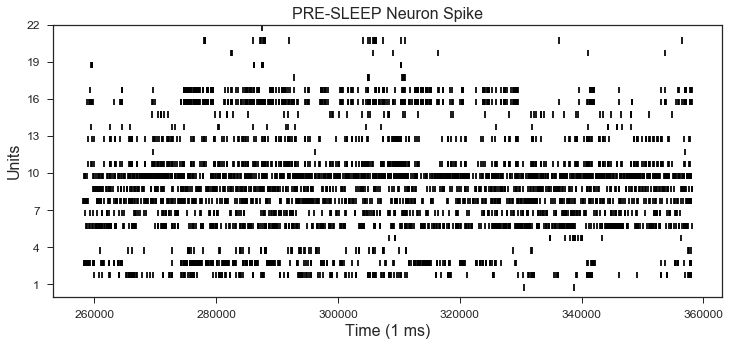

In [43]:
plt.figure(figsize=(12,5))
sns.set(style="ticks")
plt.yticks( range(1,len(Fpre.columns)+10,3),fontsize=12)
plt.xticks(fontsize=12)
pp = plot_NeuronSpike(Fpre,100000)
plt.title('PRE-SLEEP Neuron Spike',fontsize=16)
plt.xlabel('Time (1 ms)',fontsize=16)
plt.ylabel('Units',fontsize=16)
plt.savefig('Fpre_spike.png', dpi=500)
plt.show()

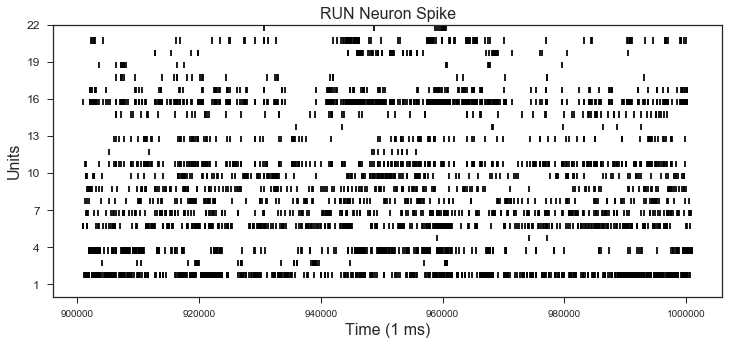

In [42]:
plt.figure(figsize=(12,5))
plt.yticks( range(1,len(Fawake.columns)+10,3),fontsize=12)
pp = plot_NeuronSpike(Fawake,100000)
plt.title('RUN Neuron Spike',fontsize=16)
plt.xlabel('Time (1 ms)',fontsize=16)
plt.ylabel('Units',fontsize=16)
plt.savefig('Fawake_spike.png', dpi=500)
plt.show()

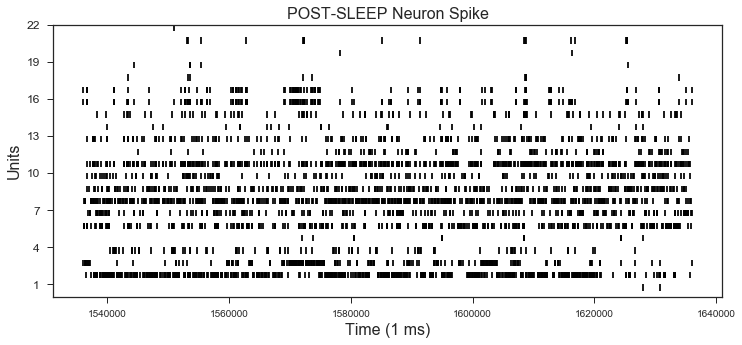

In [41]:
plt.figure(figsize=(12,5))
plt.yticks( range(1,len(Fsleep.columns)+10,3),fontsize=12)
pp = plot_NeuronSpike(Fsleep,100000)
plt.title('POST-SLEEP Neuron Spike',fontsize=16)
plt.xlabel('Time (1 ms)',fontsize=16)
plt.ylabel('Units',fontsize=16)
plt.savefig('Fsleep_spike.png', dpi=500)
plt.show()

## Spilt the data to train and test data for the parameters and feature calculting

In [140]:
X_train_o, X_test_o = train_test_split(Fpre, test_size = 0.3, random_state=42) #random selected 70% entire data as the trainning data
size = len(X_test_o)
X_train2_o, X_test2_o = train_test_split(Fawake, test_size = 0.3, random_state=42)

#Select the neuron1 to the last one
last_neuron = len(X_train_o.columns)

X_train = X_train_o.iloc[:,1:last_neuron]
X_test = X_test_o.iloc[:,1:last_neuron]
X_train2 = X_train2_o.iloc[:,1:last_neuron]
X_test2 = X_test2_o.iloc[:,1:last_neuron]

## Score strategy for the 3 different neuron population models
### Running the function based on the script Neuron_PopModel_v1

In [48]:
#  Score strategy for independent model

start_time = time.time() # Record the start time

# calculating the pre-sleep score

In_Fpre_px_given_awakemodel = independent(X_test, X_train2)
In_Fpre_px_given_premodel = independent(X_test, X_train)

In_score_Fpre = np.log(In_Fpre_px_given_awakemodel) - np.log(In_Fpre_px_given_premodel) 

# calculating the awake score

In_Fawake_px_given_awakemodel = independent(X_test2, X_train2)
In_Fawake_px_given_premodel = independent(X_test2, X_train)

In_score_Fawake = np.log(In_Fawake_px_given_awakemodel) - np.log(In_Fawake_px_given_premodel)

# caculating the score of post-sleep by independent model 

In_Fsleep_px_given_awakemodel = independent(Fsleep2, X_train2)
In_Fsleep_px_given_premodel = independent(Fsleep2, X_train)

In_score_Fsleep = np.log(In_Fsleep_px_given_awakemodel) - np.log(In_Fsleep_px_given_premodel)

print("--- %s seconds ---" % (time.time() - start_time)) # End time

--- 0.24916696548461914 seconds ---


In [86]:
# Score strategy for population counting model

start_time = time.time() # Record the start time

# calculating the pre-sleep score

PopCount_Fpre_px_given_awakemodel = popcounting(X_test, X_train2)
PopCount_Fpre_px_given_premodel = popcounting(X_test, X_train)

PopCount_score_Fpre = np.log(PopCount_Fpre_px_given_awakemodel) - np.log(PopCount_Fpre_px_given_premodel) 

# calculating the awake score

PopCount_Fawake_px_given_awakemodel = popcounting(X_test2, X_train2)
PopCount_Fawake_px_given_premodel = popcounting(X_test2, X_train)

PopCount_score_Fawake = np.log(PopCount_Fawake_px_given_awakemodel) - np.log(PopCount_Fawake_px_given_premodel) 

# caculating the score of post-sleep by population counting model 

start_time = time.time()

PopC_Fsleep_px_given_awakemodel = popcounting(Fsleep2, X_train2)
PopC_Fsleep_px_given_premodel = popcounting(Fsleep2, X_train)

PopCount_score_Fsleep = np.log(PopC_Fsleep_px_given_awakemodel) - np.log(PopC_Fsleep_px_given_premodel)

print("--- %s seconds ---" % (time.time() - start_time))# End time

--- 3.217334508895874 seconds ---


In [141]:
# Score strategy for population tracking model

start_time = time.time() # Record the start time

# calculating the parameters of PK and Px given K
p_xi_givenk_pre, p_k_pre = fitPopTrack(X_train)
p_xi_givenk_awake, p_k_awake = fitPopTrack(X_train2)
    
ak_pre = Compute_ak(p_xi_givenk_pre, 10000, 10000)
ak_awake = Compute_ak(p_xi_givenk_awake, 10000, 10000)

# calculating the pre-sleep score

PopT_Fpre_px_given_awakemodel = Compute_px(X_test, ak_awake, p_k_awake, p_xi_givenk_awake)
PopT_Fpre_px_given_premodel = Compute_px(X_test, ak_pre, p_k_pre, p_xi_givenk_pre)
PopT_score_Fpre = np.log(PopT_Fpre_px_given_awakemodel) - np.log(PopT_Fpre_px_given_premodel)
#PopT_score_Fpre = (np.log(PopT_Fpre_px_given_awakemodel) - np.log(PopT_Fpre_px_given_premodel))/(np.log(PopT_Fpre_px_given_awakemodel) + np.log(PopT_Fpre_px_given_premodel))

# calculating the awake score
PopT_Fawake_px_given_awakemodel = Compute_px(X_test2, ak_awake, p_k_awake, p_xi_givenk_awake)
PopT_Fawake_px_given_premodel = Compute_px(X_test2, ak_pre, p_k_pre, p_xi_givenk_pre)
PopT_score_Fawake = np.log(PopT_Fawake_px_given_awakemodel) - np.log(PopT_Fawake_px_given_premodel)
#PopT_score_Fawake = (np.log(PopT_Fawake_px_given_awakemodel) - np.log(PopT_Fawake_px_given_premodel))/(np.log(PopT_Fawake_px_given_awakemodel) + np.log(PopT_Fawake_px_given_premodel))

# caculating the score of post-sleep by population tracking model 

PopT_Fsleep_px_given_awakemodel = Compute_px(Fsleep2, ak_awake, p_k_awake, p_xi_givenk_awake)
PopT_Fsleep_px_given_premodel = Compute_px(Fsleep2, ak_pre, p_k_pre, p_xi_givenk_pre)
PopT_score_Fsleep = np.log(PopT_Fsleep_px_given_awakemodel) - np.log(PopT_Fsleep_px_given_premodel)
#PopT_score_Fsleep = (np.log(PopT_Fsleep_px_given_awakemodel) - np.log(PopT_Fsleep_px_given_premodel)) / (np.log(PopT_Fsleep_px_given_awakemodel) + np.log(PopT_Fsleep_px_given_premodel))

print("--- %s seconds ---" % (time.time() - start_time)) # End time

--- 52.37124514579773 seconds ---


## Plot the score distribution 

In [ ]:
p_pre, bins_pre, cdf_pre = cdf(PopT_score_Fpre, 100)
p_awake, bins_awake, cdf_awake = cdf(PopT_score_Fawake, 100)
p_sleep, bins_sleep, cdf_sleep = cdf(PopT_score_Fsleep, 100)

In [ ]:
p_pre, bins_pre, cdf_pre = cdf(In_score_Fpre, 100)
p_awake, bins_awake, cdf_awake = cdf(In_score_Fawake, 100)
p_sleep, bins_sleep, cdf_sleep = cdf(In_score_Fsleep, 100)

plt.plot(bins_pre,cdf_pre,'r')
plt.plot(bins_awake,cdf_awake,'g')
plt.plot(bins_sleep,cdf_sleep,'b')
plt.xlabel('Score', fontsize=18)
plt.ylabel('Cumsum_P', fontsize=16)
plt.show()

In [ ]:
p_pre, bins_pre, cdf_pre = cdf(PopCount_score_Fpre, 100)
p_awake, bins_awake, cdf_awake = cdf(PopCount_score_Fawake, 100)
p_sleep, bins_sleep, cdf_sleep = cdf(PopCount_score_Fsleep, 100)

In [ ]:
p_pre, bins_pre, cdf_pre = cdf(In_score_Fpre, 100)
p_awake, bins_awake, cdf_awake = cdf(In_score_Fawake, 100)
p_sleep, bins_sleep, cdf_sleep = cdf(In_score_Fsleep, 100)

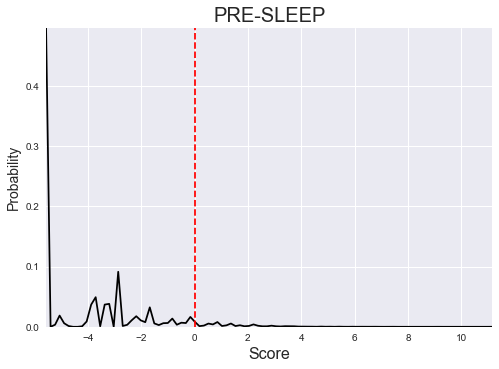

In [9]:
plt.plot(bins_pre, p_pre,'black')
plt.title('PRE-SLEEP', fontsize=20)
Ymax = p_pre.max()
Xmax = bins_pre.max()
Xmin = bins_pre.min()
plt.axis([Xmin, Xmax, 0, Ymax])

plt.xlabel('Score', fontsize=16)
plt.ylabel('Probability', fontsize=14)
plt.axvline(x=0, color='r', linestyle='--')
plt.savefig('Fpre_Sleep_score_300_C.png', dpi=500)
plt.show()

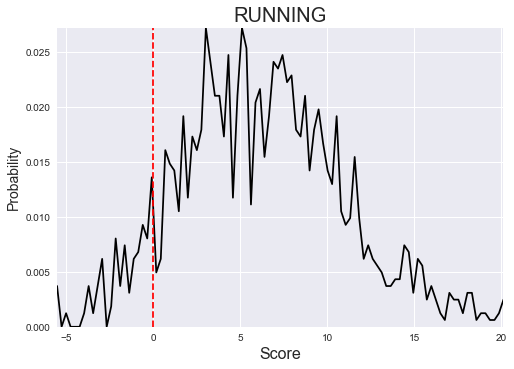

In [10]:
#plt.yticks([0.00,0.01,0.02,0.03,0.04],fontsize=12)
plt.plot(bins_awake, p_awake,'black')
plt.title('RUNNING', fontsize=20)
Ymax = p_awake.max()
Xmax = bins_awake.max()
Xmin = bins_awake.min()
plt.axis([Xmin, Xmax, 0, Ymax])
plt.xlabel('Score', fontsize=16)
plt.ylabel('Probability', fontsize=14)
plt.axvline(x=0, color='r', linestyle='--')
plt.savefig('Fawake_score_300_C.png', dpi=500)
plt.show()

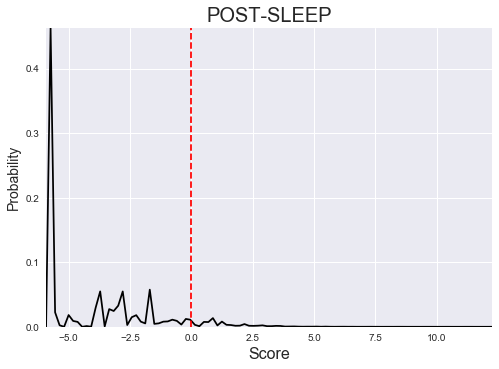

In [11]:
plt.plot(bins_sleep, p_sleep, 'black')
plt.title('POST-SLEEP', fontsize=20)
Ymax = p_sleep.max()
Xmax = bins_sleep.max()
Xmin = bins_sleep.min()
plt.axis([Xmin, Xmax, 0, Ymax])
plt.xlabel('Score', fontsize=16)
plt.ylabel('Probability', fontsize=14)
plt.axvline(x=0, color='r', linestyle='--')
plt.savefig('FpSleep_score_300_C.png', dpi=500)
plt.show()

## Plot the scatter of score and MUF
## plot the scatter of score and MUA

In [62]:
Fcount_pre = count(X_test)
Fcount_awake = count(X_test2)

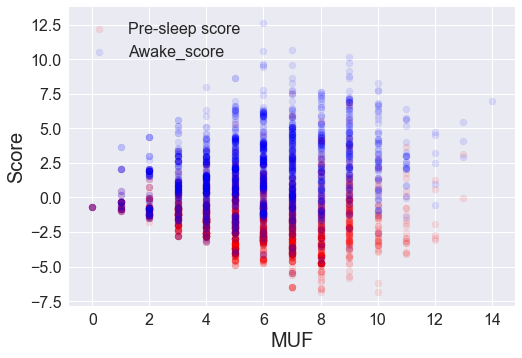

In [9]:
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
pre = plt.scatter(Fcount_pre, PopT_score_Fpre, c='r', alpha = 0.1)
awake = plt.scatter(Fcount_awake, PopT_score_Fawake, c= 'b', alpha =0.1)
plt.xlabel('MUF', fontsize=20)
plt.ylabel('Score', fontsize=20)
plt.legend((pre, awake),
           ('Pre-sleep score', 
            'Awake_score'),
           scatterpoints = 1,
           #loc='lower right',
           #loc='upper right',
           ncol=1,
           fontsize=16)
plt.savefig('Fpre_awake_count&score_300_PopT.png', dpi=500)
plt.show()

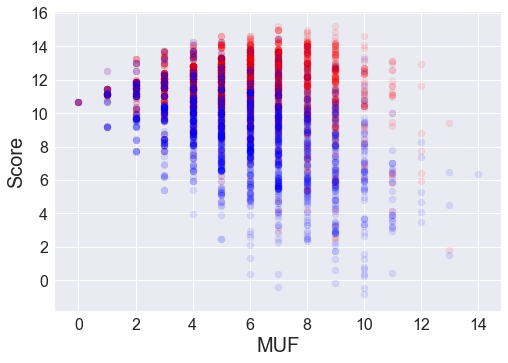

In [52]:
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
pre = plt.scatter(Fcount_pre, In_score_Fpre, c='r', alpha = 0.1)
awake = plt.scatter(Fcount_awake, In_score_Fawake, c= 'b', alpha =0.1)
plt.xlabel('MUF', fontsize=20)
plt.ylabel('Score', fontsize=20)
#plt.legend((pre, awake),
           #('Pre-sleep score', 
            #'Awake_score'),
           #scatterpoints = 1,
           #loc='lower right',
           #loc='upper right',
           #ncol=1,
           #fontsize=16)
plt.savefig('Fpre_awake_count&score_300_IN.png', dpi=500)
plt.show()

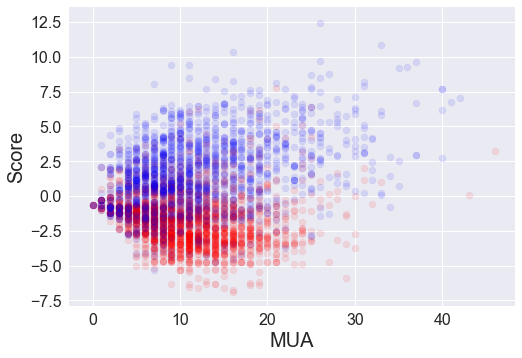

In [38]:
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
pre = plt.scatter(df_pre.count_sum.values, PopT_score_Fpre, c='r', alpha = 0.1)
awake = plt.scatter(df_awake.count_sum.values, PopT_score_Fawake, c= 'b', alpha =0.1)
plt.xlabel('MUA', fontsize=20)
plt.ylabel('Score', fontsize=20)
#plt.legend((pre, awake),
           #('Pre-sleep score', 
            #'Awake_score'),
           #scatterpoints = 1,
           #loc='lower right',
           #loc='upper right',
           #ncol=1,
           #fontsize=16)
plt.savefig('Fpre_awake_mua&score_300.png', dpi=500)
plt.show()

In [67]:
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
pre = plt.scatter(df_pre., PopC_score_Fpre, c='r', alpha = 0.1)
awake = plt.scatter(Fcount_awake, PopC_score_Fawake, c= 'b', alpha =0.1)
plt.xlabel('MUF', fontsize=20)
plt.ylabel('Score', fontsize=20)
#plt.legend((pre, awake),
           #('Pre-sleep score', 
            #'Awake_score'),
           #scatterpoints = 1,
           #loc='lower right',
           #loc='upper right',
           #ncol=1,
           #fontsize=16)
plt.savefig('Fpre_awake_count&score_300_IN.png', dpi=500)
plt.show()

NameError: name 'PopC_score_Fpre' is not defined

## Plot the box of MUF, Score and MUA

In [142]:
Fcount_pre = count(X_test)
Fcount_awake = count(X_test2)

In [143]:
df_awake = pd.DataFrame({'MUF':Fcount_awake, 'Score':PopT_score_Fawake, 'MUA':X_test2_o.iloc[:,0].values})
df_pre = pd.DataFrame({'MUF':Fcount_pre, 'Score':PopT_score_Fpre, 'MUA':X_test_o.iloc[:,0].values})

In [87]:
df_awake = pd.DataFrame({'count':Fcount_awake, 'score':In_score_Fawake, 'count_sum':X_test2_o.iloc[:,0].values})
df_pre = pd.DataFrame({'count':Fcount_pre, 'score':In_score_Fpre, 'count_sum':X_test_o.iloc[:,0].values})

In [118]:
df_awake = pd.DataFrame({'count':Fcount_awake, 'score':PopCount_score_Fawake, 'count_sum':X_test2_o.iloc[:,0].values})
df_pre = pd.DataFrame({'count':Fcount_pre, 'score':PopCount_score_Fpre, 'count_sum':X_test_o.iloc[:,0].values})

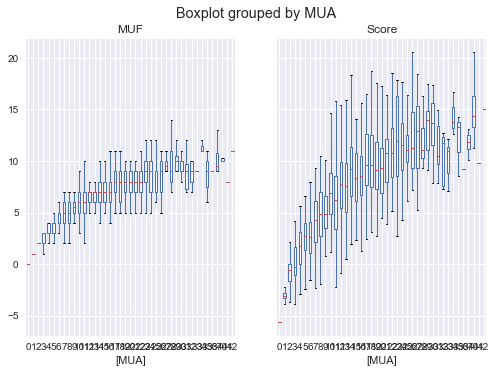

In [21]:
df_awake.boxplot(by='MUA')
plt.show()

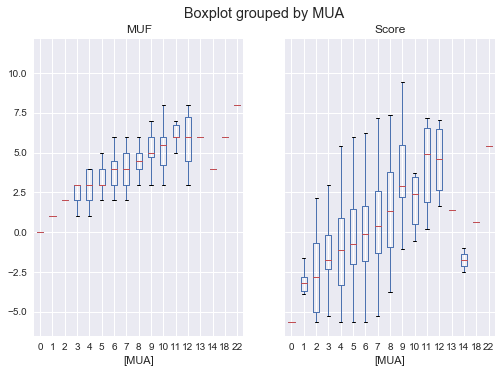

In [22]:
df_pre.boxplot(by='MUA')
plt.show()

## Build models to classify the awake and pre-sleep neural pattern

In [144]:
df_pre.insert(2, 'class', 0) #pre pattern is 0
df_awake.insert(2, 'class', 1)#awake pattern is 1
df_rat = pd.concat([df_pre,df_awake])# meage the pre and awake pattern data

In [145]:
score_data = df_rat #add all the features
X_train_score, X_test_score = train_test_split(score_data, test_size = 0.3, random_state=42) # spilt the data to train and test

## KNN model and accuracy

Automatically created module for IPython interactive environment


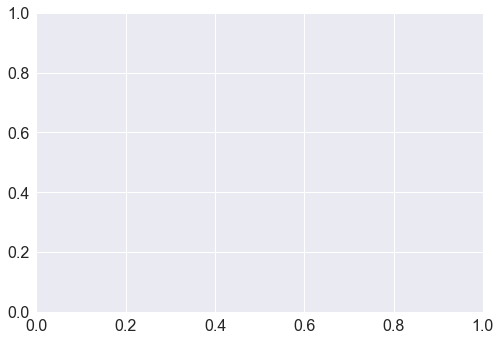

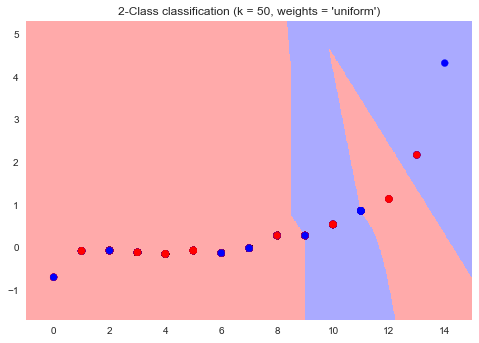

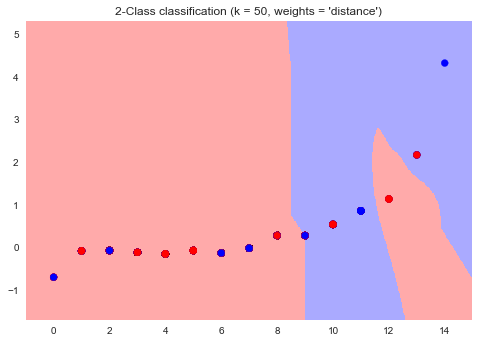

In [22]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 50

# import some data to play with
iris = datasets.load_iris()
#X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
#y = iris.target
X = X_train_score[['count','score']].values

y = X_train_score['class'].values
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [34]:
test_pred = clf.predict(X_test_score[['count','score']].values)
accuracy_score(X_test_score['class'].values, test_pred)

0.5539867109634552

In [60]:
target_names = ['sleep','awake']
print(classification_report(X_test_score['class'].values, test_pred, target_names=target_names))

             precision    recall  f1-score   support

      sleep       0.60      0.78      0.68       735
     replay       0.37      0.20      0.26       469

avg / total       0.51      0.55      0.52      1204



## Support vector machine and accuracy

In [146]:
from sklearn.svm import SVC
X = X_train_score[['MUF','Score','MUA']].values
y = X_train_score['class'].values
clf_svm = SVC()
clf_svm.fit(X, y) 
pred_svm = clf_svm.predict(X_test_score[['MUF','Score','MUA']].values)
accuracy_score(X_test_score['class'].values, pred_svm)

0.97296137339055799

In [147]:
target_names = ['sleep','awake']
print(classification_report(X_test_score['class'].values, pred_svm, target_names=target_names))

             precision    recall  f1-score   support

      sleep       0.98      1.00      0.99      6675
      awake       0.86      0.48      0.62       315

avg / total       0.97      0.97      0.97      6990



## XGBoost and accuracy

In [89]:
import xgboost as xgb

xgb_params = {
    'eta': 0.02,
    'max_depth': 6,
    'subsample': 0.6,
    'colsample_bytree': 0.6,
    'objective':'binary:logistic',
    'eval_metric': 'error',
    'silent': 1
}

X = X_train_score[['MUF','Score','MUA']]
y = X_train_score['class']
x_test1 = X_test_score[['MUF','Score','MUA']]

dtrain_0 = xgb.DMatrix(X, y)
dtest_0 = xgb.DMatrix(x_test1)

num_boost_rounds = 200
model_0 = xgb.train(dict(xgb_params, silent=0), dtrain_0, num_boost_round=num_boost_rounds)

y_predict_0 = model_0.predict(dtest_0)

In [90]:
y_predict_0[y_predict_0 > 0.5] = 1
y_predict_0[y_predict_0 <= 0.5] = 0
target_names = ['sleep','awake']
print(classification_report(X_test_score['class'].values, y_predict_0, target_names=target_names))

             precision    recall  f1-score   support

      sleep       0.99      1.00      0.99      6364
      awake       0.91      0.74      0.82       343

avg / total       0.98      0.98      0.98      6707



### plot the feature importancce

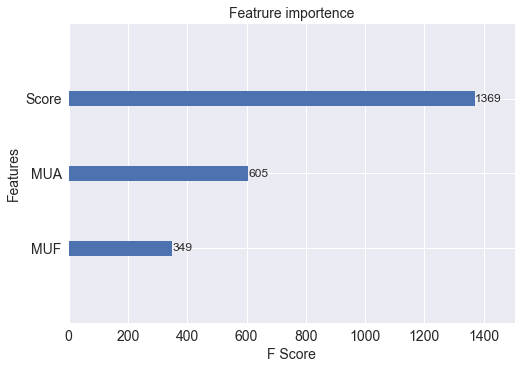

In [38]:
from xgboost import plot_importance
ax = plot_importance(model_0)
fig = ax.figure
plt.xlabel('F Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Featrure importence',fontsize=14)
plt.savefig('Feature importance2', dpi = 500)
plt.show()

## Apply the model to the post-sleep data 

In [148]:
Fcount_sleep = count(Fsleep2)
df_sleep = pd.DataFrame({'MUF':Fcount_sleep, 'Score':PopT_score_Fsleep})
df_sleep.insert(2, 'MUA', Fsleep.iloc[:,0].values)

In [149]:
answer_svm = clf_svm.predict(df_sleep)
np.count_nonzero(answer_svm == 1)

351

### Randomly select the detected replay pattern in post-sleep

C:\Users\Anqi Wang\Desktop\TB1\Machine learning\Anaconda2\envs\snakes\lib\site-packages\ipykernel\__main__.py:10: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\Anqi Wang\Desktop\TB1\Machine learning\Anaconda2\envs\snakes\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Anqi Wang\Desktop\TB1\Machine learning\Anaconda2\envs\snakes\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


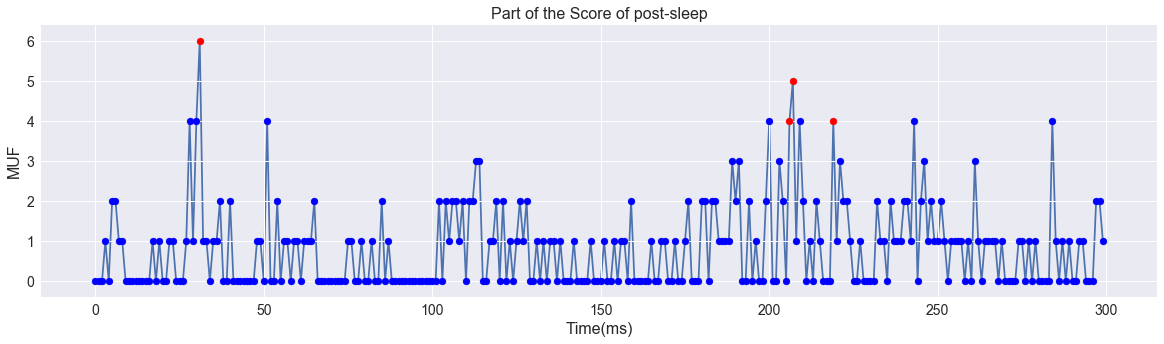

In [311]:
plt.figure(figsize=(20,5))
plt.xlabel('Time(ms)', fontsize=16)
plt.ylabel('MUF', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
example_sleep = df_sleep.MUF[23800:24100]
x = np.arange(0,300,1)
replay = [23831, 24006, 24007, 24019,]
replay_bool=(df_sleep.index[23800:24100] != [23831]) & (df_sleep.index[23800:24100] != [24006])& (df_sleep.index[23800:24100] != [24007])& (df_sleep.index[23800:24100] != [24019])
plt.hold(True)
plt.plot(x,example_sleep,zorder=-1)
plt.scatter(x[replay_bool],example_sleep[replay_bool], label='signal', c='b')
plt.scatter(x[~replay_bool],example_sleep[~replay_bool], label='signal', c='r')
plt.title('Part of the Score of post-sleep',fontsize=16)
plt.savefig('Fsleep_replay_MUF.png', dpi=500)
plt.show()


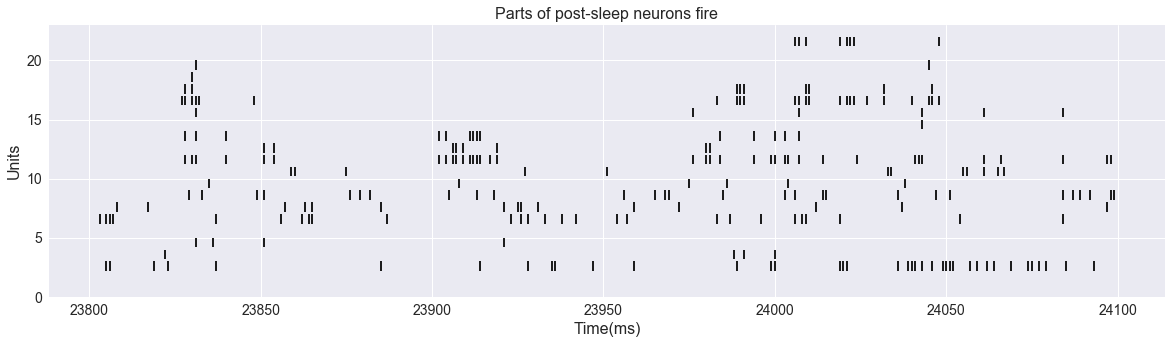

In [305]:
plt.figure(figsize=(20,5))
plt.xlabel('Time(ms)', fontsize=16)
plt.ylabel('Units', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
select_index = range(23800,24100,1)
data_num = Fsleep.loc[Fsleep.index[select_index].values]
spikes = []
nr = range(len(data_num.columns))

for i in nr:

    oninds = data_num[data_num[data_num.columns[i]] == 1].index.values
    spikes.append(oninds)

ax = plt.gca() 
    
for ith, trial in enumerate(spikes):

    plt.vlines(trial, ith + 0.2, ith + 1)
    
plt.ylim(0, len(spikes))
plt.title('Parts of post-sleep neurons fire',fontsize=16)
plt.savefig('Post_sleep_neuron_fire_part.png', dpi=500)
plt.show()

In [91]:
dtest_1 = xgb.DMatrix(df_sleep)
answer_xgb = model_0.predict(dtest_1)
np.count_nonzero(answer_xgb >0.5)

98

### Generate SWR replay time from SWR data 

In [157]:
Fpsleep_ripple = SWR(original_data_ripple, epochs, 'Felix', 30, 0, 'Frip', 1)

In [105]:
Fpsleep_ripple = SWR(original_data_ripple, epochs, 'Jasper', 20, 0, 'Jrip', 1)

In [20]:
Fpsleep_ripple = SWR(original_data_ripple, epochs, 'Gerrit', 50, 0, 'Grip', 1)

In [150]:
Fpsleep_ripple = SWR(original_data_ripple, epochs, 'Ibsen', 50, 0, 'Grip', 1)

In [123]:
Fpsleep_ripple = SWR(original_data_ripple, epochs, 'Herman', 50, 0, 'Hrip', 1)

In [151]:
np.count_nonzero(Fpsleep_ripple == 1)

557

In [79]:
# compare the result by using MUA only
#bbbb = Fsleep.iloc[:,0].values
#bbbb[bbbb<=6]=0
#bbbb[bbbb>6]=1

In [80]:
#np.count_nonzero(bbbb == 1)

0

## Compare the ML model based detection result to the SWR replay smoothed by Gaussian kernel. 

In [152]:
blurred1, blurred_swr1 = compare_swr(answer_svm, Fpsleep_ripple,200)

In [111]:
blurred1, blurred_swr1 = compare_swr(aaaa, Fpsleep_ripple, 200)

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(blurred_swr1,'r')
plt.plot(blurred1,'g')
plt.show()

## Calculate R square and RMSE

In [135]:
from sklearn.metrics import r2_score
r2_score(blurred_swr1, blurred1) 

0.77685131552254505

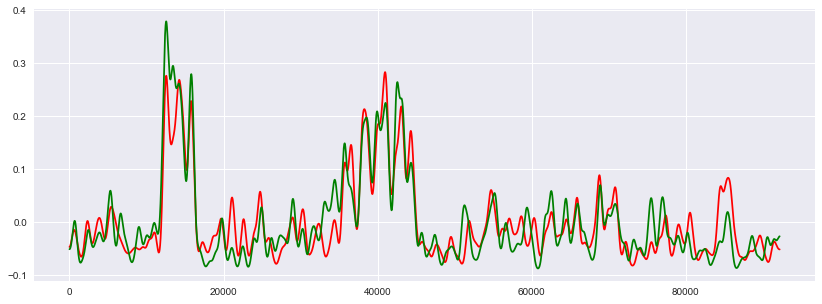

In [54]:
plt.figure(figsize=(14,5))
plt.plot(blurred_swr1,'r')
plt.plot(blurred1,'g')
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(blurred_swr1, blurred1)**0.5
RMSE

0.037041222194228327